### Steps
#### 1- Import necessary libraries
#### 2- Read and explore the dataset
#### 3- Build a model using 
#### 4- Evaluate the model's accuracy

In [1]:
pip install numpy pandas sklearn


Note: you may need to restart the kernel to use updated packages.


#### 1- Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

#### 2- Read and explore the dataset

In [5]:
news_data= pd.read_csv("news.csv")
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
news_data.shape

(6335, 4)

In [7]:
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [10]:
news_data.describe(include='O')

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [12]:
df1=pd.DataFrame({'counts':news_data["label"].value_counts(),'percentage':news_data["label"].value_counts()/len(news_data)})
df1

,counts,percentage
REAL,3171,0.500552
FAKE,3164,0.499448


<BarContainer object of 2 artists>

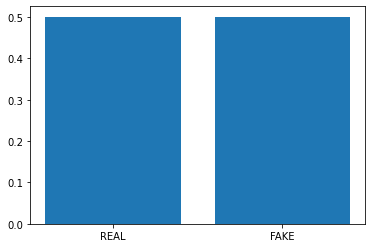

In [13]:
plt.bar(df1.index,df1.percentage)

In [14]:
labels= news_data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

#### 3- Build the model

In [18]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.2, random_state= 1)

In [21]:
#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english')
tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)

In [22]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)
y_pred

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'REAL'], dtype='<U4')

#### 4- Evaluate the model's accuracy

In [23]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[614,  37],
       [ 34, 582]], dtype=int64)

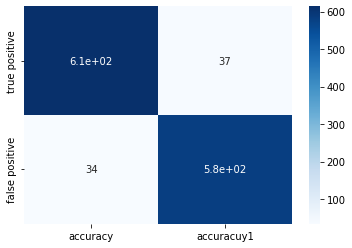

In [24]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True,xticklabels=['accuracy','accuracuy1'],yticklabels=['true positive','false positive'],cmap='Blues')
plt.show()

In [25]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

94.39621152328334

#### The model's accuracy is 94%

In [32]:
Report= classification_report(y_test, y_pred)
print('classification report:\n',Report)

classification report:
               precision    recall  f1-score   support

        FAKE       0.95      0.94      0.95       651
        REAL       0.94      0.94      0.94       616

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

